In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import skimage io  to read, show and hanlde an image
# https://scikit-image.org/docs/dev/api/skimage.io.html

from skimage import io
from sklearn.cluster import KMeans

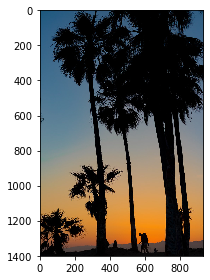

In [3]:
# read the image
img = io.imread('../assets/palm_trees.jpg')
io.imshow(img)

In [4]:
img.shape

(1401, 934, 3)

Notice it is a 3 dimensional array,
- hight : 1401
- width : 934
- channels : 3

In [5]:
# in order to use this image for k means clustering we have to convert it into
# x feature set, where each column will represnt the corresponding RGB values
# we can reshape it into H*W

In [6]:
# flatten the image

In [7]:
(row,column,dimension) =  img.shape

In [8]:
flat_img = img.reshape(row * column,dimension)

In [9]:
flat_img

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [10]:
flat_img.shape

(1308534, 3)

In [11]:
k_mean = KMeans(n_clusters=4)

In [12]:
k_mean.fit(flat_img)

KMeans(n_clusters=4)

In [13]:
# replace each pixel values with it's near by centroid 
k_mean.cluster_centers_

array([[  4.27055902,   4.01187661,   5.14145605],
       [150.60889593, 147.55149052, 137.92977413],
       [ 72.61124932, 100.93314306, 123.14201765],
       [211.44581128, 142.39243119,  66.88243237]])

In [14]:
k_mean.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [15]:
compressed_image = k_mean.cluster_centers_[k_mean.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)


In [16]:
compressed_image = compressed_image.reshape(row,column,3)

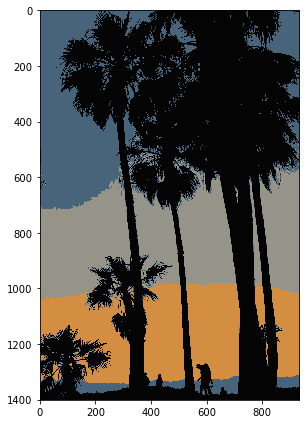

In [17]:
plt.figure(figsize=(6,6))
io.imshow(compressed_image)

In [18]:
io.imsave('compressed_image_64.png', compressed_image)